# Route Estimator
This software is to help predict the most energy optimized path between two destinations. The default method for computing shortest path can be changed in the `config.py`. The current example edge weight is based on length to show functionality of the markers. There are two provided models that can be applied to the graph to compute an energy consumption estimate. The weight mode can then be changed accordingly.

In [1]:
import sys
sys.path.append("route_estimator")
sys.path.append("route_estimator/models")
sys.path.append("route_estimator/weather")
sys.path.append("route_estimator/traffic")
sys.path.append("range_estimator")
from route_estimator import RouteEstimator
from range_estimator import RangeEstimator
from config import Config

 To get started you will need an instance of the RouteEstimator object created with the config file. You will need to setup the config file to include api keys.

In [2]:
route_estimator_length = RouteEstimator(Config())

## Example of the Default Map

In [3]:
route_map = route_estimator_length.create_map()
route_map

Map(center=[41.740563, -111.81391], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

 ## Example of Simple Energy Model
 Requires: Google Maps API Key, Open Weather API Key

In [4]:
route_estimator_simple_model = RouteEstimator(Config(), graph=route_estimator_length.get_graph())
route_estimator_simple_model.activate_energy_model()
route_map_simple_e = route_estimator_simple_model.create_map()
route_map_simple_e

Map(center=[41.740563, -111.81391], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [6]:
#You must use the map first to create a path or else these methods will return null

In [7]:
#Example of getting path nodes
last_nodes = route_estimator_simple_model.get_last_path_nodes()
print(last_nodes)

                    y           x  street_count  elevation          highway  \
osmid                                                                         
428959026   41.738251 -111.826031             1   1399.252              NaN   
428959019   41.737693 -111.826091             3   1398.675              NaN   
82882728    41.737688 -111.827035             3   1396.386              NaN   
82916893    41.736991 -111.827053             4   1397.502              NaN   
82901491    41.736979 -111.826306             3   1400.620              NaN   
82916891    41.736958 -111.824469             4   1408.478              NaN   
82916889    41.736928 -111.821971             4   1413.261              NaN   
4462226984  41.736943 -111.820942             3   1414.384              NaN   
321552735   41.736947 -111.820463             3   1413.989              NaN   
82920973    41.738377 -111.819406             3   1415.380              NaN   
82913516    41.738815 -111.819388             4   14

In [8]:
#Example of getting path related edges
last_rel_edges = route_estimator_simple_model.get_last_path_rel_edges()
print(last_rel_edges)

                                                       osmid      highway  \
u          v          key                                                   
428959026  428959019  0                             36893662  residential   
428959019  82882730   0                             10080083  residential   
           82882728   0                             10080083  residential   
           428959026  0                             36893662  residential   
82882728   428959019  0                             10080083  residential   
           82916893   0                            182952357  residential   
           82926560   0                            182952357  residential   
82916893   82882728   0                            182952357  residential   
           82901491   0                            182953049  residential   
           82924869   0                            182952357  residential   
           82916897   0                            182953049  residential   

## Example of Isochrone

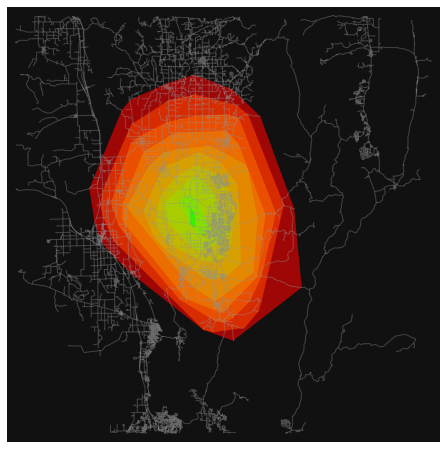

In [9]:
range_estimator_simple_model = RangeEstimator(Config(), route_estimator_simple_model.get_graph())
range_estimator_simple_model.generate_isochrone()

 ## Example of FASTSim Energy Model
 Requires: Google Maps API Key, Open Weather API Key

 Note: FASTSim calculations may take a few minutes

In [10]:
%%time
route_estimator_fastsim_model = RouteEstimator(Config("FASTSIM"), graph=route_estimator_length.get_graph())
route_estimator_fastsim_model.activate_energy_model()
route_map_fastsim_e = route_estimator_fastsim_model.create_map()
route_map_fastsim_e

JITing model, please wait...
CPU times: user 8min 47s, sys: 778 ms, total: 8min 48s
Wall time: 8min 47s


Map(center=[41.740563, -111.81391], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

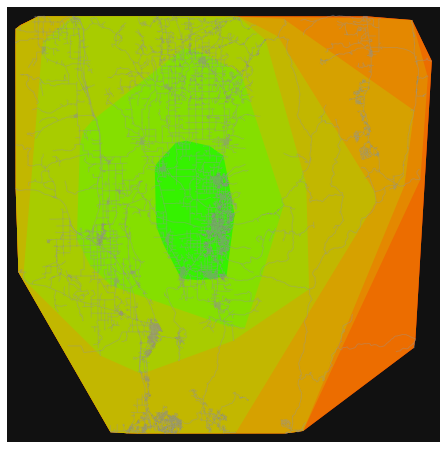

In [11]:
range_estimator_fastsim_model = RangeEstimator(Config("FASTSIM"), route_estimator_fastsim_model.get_graph())
range_estimator_fastsim_model.generate_isochrone()